In [1]:
# Imports
import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf

## Les réseaux de neurones convolutionnels CNN

In [2]:
#Import dataset
import pathlib
import os
data_dir = tf.keras.utils.get_file(
    "dataset.zip",
    "https://github.com/AurelienGG/EFREI_DEV_ML_OPS_Project/blob/main/data/dataset.zip?raw=true",
    extract=False)

import zipfile
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

data_dir = pathlib.Path('/content/datasets/dataset')
print(data_dir)
print(os.path.abspath(data_dir))

1126244/1126244 [==============================] - 0s 0us/step
/content/datasets/dataset
/content/datasets/dataset


In [3]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

174


In [4]:
batch_size = 3
img_height = 200
img_width = 200

train_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  )

val_data = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = val_data.class_names
print(class_names)

Found 174 files belonging to 2 classes.
Using 140 files for training.
Found 174 files belonging to 2 classes.
Using 34 files for validation.
['pikachu', 'rondoudou']


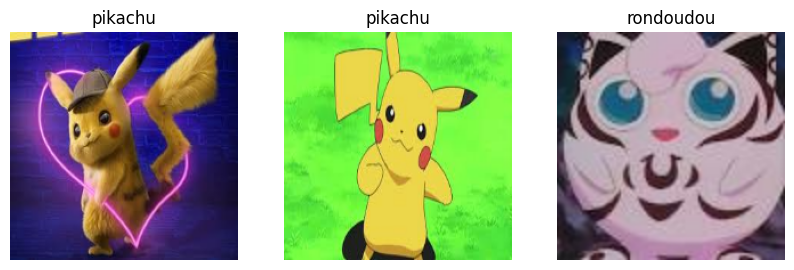

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'],)

logdir="logs"

tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir,histogram_freq=1, write_images=logdir,
                                                   embeddings_data=train_data)

model.fit(
    train_data,
  validation_data=val_data,
  epochs=20,
  callbacks=[tensorboard_callback]
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 13s 51ms/step - loss: 0.5956 - accuracy: 0.7071 - val_loss: 0.3347 - val_accuracy: 0.9118
Epoch 2/20
47/47 [==============================] - 1s 17ms/step - loss: 0.2134 - accuracy: 0.9571 - val_loss: 0.3247 - val_accuracy: 0.9412
Epoch 3/20
47/47 [==============================] - 1s 19ms/step - loss: 0.1979 - accuracy: 0.9643 - val_loss: 0.3204 - val_accuracy: 0.9706
Epoch 4/20
47/47 [==============================] - 1s 17ms/step - loss: 0.1456 - accuracy: 0.9643 - val_loss: 0.3501 - val_accuracy: 0.9706
Epoch 5/20
47/47 [==============================] - 1s 21ms/step - loss: 0.3426 - accuracy: 0.8786 - val_loss: 0.4813 - val_accuracy: 0.8235
Epoch 6/20
47/47 [==============================] - 1s 29ms/step - loss: 0.3963 - accuracy: 0.8786 - val_loss: 0.2322 - val_accuracy: 0.9412
Epoch 7/20
47/47 [==============================] - 1s 24ms/step - loss: 0.2149 - accuracy: 0.9071 - val_loss: 0.3780 - val_accuracy: 0.9118
Epoch 8/20
47/47 [=====

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 197, 197, 128)     6272      
                                                                 
 max_pooling2d (MaxPooling2  (None, 98, 98, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 64)        131136    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 47, 47, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        3

In [13]:
from google.colab import files
file_to_predict = files.upload()
for file_ in file_to_predict:
    image_to_predict = cv2.imread(file_,cv2.IMREAD_COLOR)
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.show()
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict,(200,200)), axis=0)
    predict = model.predict(img_to_predict)
    print("predict : ")
    print(predict)
    res = np.argmax(predict, axis=1)[0]
    print("res : ")
    print(res)
    if res == 1:
        print("IT'S A PIKACHU !")
    elif res == 0 :
        print("IT'S A RONDOUDOU !")